## Healthcare PGP

### Problem Statement
##### NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
##### The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

#### Build a model to accurately predict whether the patients in the dataset have diabetes or not.

#### Task1
1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value: <br>
• Glucose
• BloodPressure
• SkinThickness
• Insulin
• BMI
2. Visually explore these variables using histograms. Treat the missing values accordingly.
3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

<span style='color:Orange'> Step1: Read Data and Relevant Library </span>

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np

In [2]:
Diabetes_Dataset = pd.read_csv("C:/Working Files/Mac ka folder/Simplilearn/Project 2/Healthcare - Diabetes/health care diabetes.csv")

<span style='color:Orange'> Step2: Study data shape and perform validation Null Values or features 1.Glucose; 2.BloodPressure; 3.SkinThickness; 4.Insulin; 5.BMI with zero values </span>

In [3]:
Diabetes_Dataset.shape

(768, 9)

In [108]:
Diabetes_Dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [7]:
Diabetes_Dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
Diabetes_Dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
print(Diabetes_Dataset[["Glucose"]][Diabetes_Dataset["Glucose"]==0].count())
print(Diabetes_Dataset[["BloodPressure"]][Diabetes_Dataset["BloodPressure"]==0].count())
print(Diabetes_Dataset[["SkinThickness"]][Diabetes_Dataset["SkinThickness"]==0].count())
print(Diabetes_Dataset[["Insulin"]][Diabetes_Dataset["Insulin"]==0].count())
print(Diabetes_Dataset[["BMI"]][Diabetes_Dataset["BMI"]==0].count())

Glucose    5
dtype: int64
BloodPressure    35
dtype: int64
SkinThickness    227
dtype: int64
Insulin    374
dtype: int64
BMI    11
dtype: int64


<span style='color:Green'> Conclusion: Although no Null values but there are zero values for features 1.Glucose; 2.BloodPressure; 3.SkinThickness; 4.Insulin; 5.BMI. Next step replace zero with Null Value. Zero don't signify features (1.Glucose; 2.BloodPressure; 3.SkinThickness; 4.Insulin; 5.BMI) </span>

In [10]:
Diabetes_Dataset["Glucose"] = Diabetes_Dataset["Glucose"].replace(0,np.nan)
Diabetes_Dataset["BloodPressure"] = Diabetes_Dataset["BloodPressure"].replace(0,np.nan)
Diabetes_Dataset["SkinThickness"] = Diabetes_Dataset["SkinThickness"].replace(0,np.nan)
Diabetes_Dataset["Insulin"] = Diabetes_Dataset["Insulin"].replace(0,np.nan)
Diabetes_Dataset["BMI"] = Diabetes_Dataset["BMI"].replace(0,np.nan)

<span style='color:Orange'> Step3: Histogram Plot with no treatment to Null Value  </span>

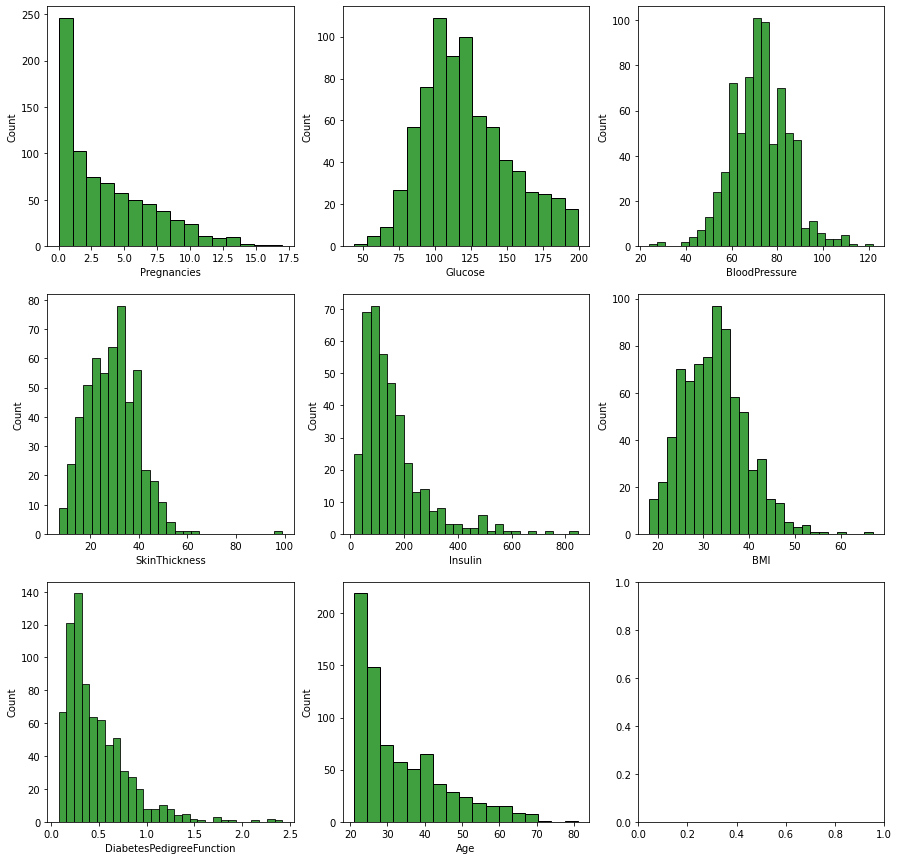

In [11]:
fig,axs = plt.subplots(nrows=3,ncols=3,figsize=(15,15))
sf_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
for i in range(0,len(sf_cols)):
    rows = i//3
    cols =i%3
    ax = axs[rows,cols]
    plot = sns.histplot (x=sf_cols[i],  data=Diabetes_Dataset,ax=ax,color="g")

<span style='color:Green'> Conclusion: In Histogram Plot, Majority of features are either left or right skew. Only 'Glucose', 'BloodPressure' have symmetric spread. Additionally 227 SkinThickness datapoints from 768 and 374 Insulin datapoints from 768 are Null. Which need to treated and re-analyzed.</span>

In [12]:
round(Diabetes_Dataset.describe(),2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,763.00,733.00,541.00,394.00,757.00,768.00,768.00,768.00
mean,3.85,121.69,72.41,29.15,155.55,32.46,0.47,33.24,0.35
std,3.37,30.54,12.38,10.48,118.78,6.92,0.33,11.76,0.48
min,0.00,44.00,24.00,7.00,14.00,18.20,0.08,21.00,0.00
25%,1.00,99.00,64.00,22.00,76.25,27.50,0.24,24.00,0.00
50%,3.00,117.00,72.00,29.00,125.00,32.30,0.37,29.00,0.00
75%,6.00,141.00,80.00,36.00,190.00,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


<span style='color:Orange'> Step4: Replace Null Value with central tendency measure. Prior to replacement lets analyze features with box plot. </span>

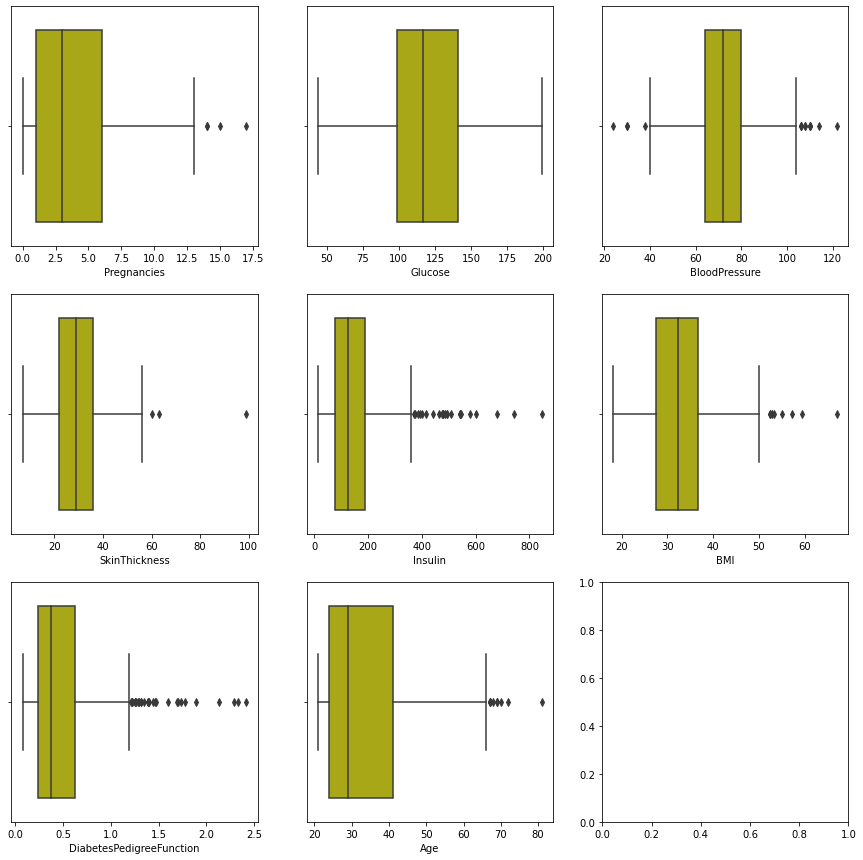

In [11]:
fig,axs = plt.subplots(nrows=3,ncols=3,figsize=(15,15))
sf_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
for i in range(0,len(sf_cols)):
    rows = i//3
    cols =i%3
    ax = axs[rows,cols]
    plot = sns.boxplot(x=sf_cols[i],  data=Diabetes_Dataset,ax=ax,color="y")

<span style='color:Green'> Conclusion: Mean will be used as replacment measure for 1.Glucose; 2.BloodPressure; whereas median will be used for 3.SkinThickness; 4.Insulin; 5.BMI as data is skewed for SkinThickness/ Insulin/ BMI.
Boxplot also indicate high number of outliers in Insulin and DiabetesPedigreeFunction, no treatment for outliers.  </span>

In [13]:
Diabetes_Dataset["Glucose"] = Diabetes_Dataset["Glucose"].replace(np.nan,Diabetes_Dataset["Glucose"].mean())
Diabetes_Dataset["BloodPressure"] = Diabetes_Dataset["BloodPressure"].replace(np.nan,Diabetes_Dataset["BloodPressure"].mean())
Diabetes_Dataset["SkinThickness"] = Diabetes_Dataset["SkinThickness"].replace(np.nan,Diabetes_Dataset["SkinThickness"].median())
Diabetes_Dataset["Insulin"] = Diabetes_Dataset["Insulin"].replace(np.nan,Diabetes_Dataset["Insulin"].median())
Diabetes_Dataset["BMI"] = Diabetes_Dataset["BMI"].replace(np.nan,Diabetes_Dataset["BMI"].median())

In [14]:
Diabetes_Dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<span style='color:Orange'> Step5: Histogram and Box Plot with treated Null Value  </span>

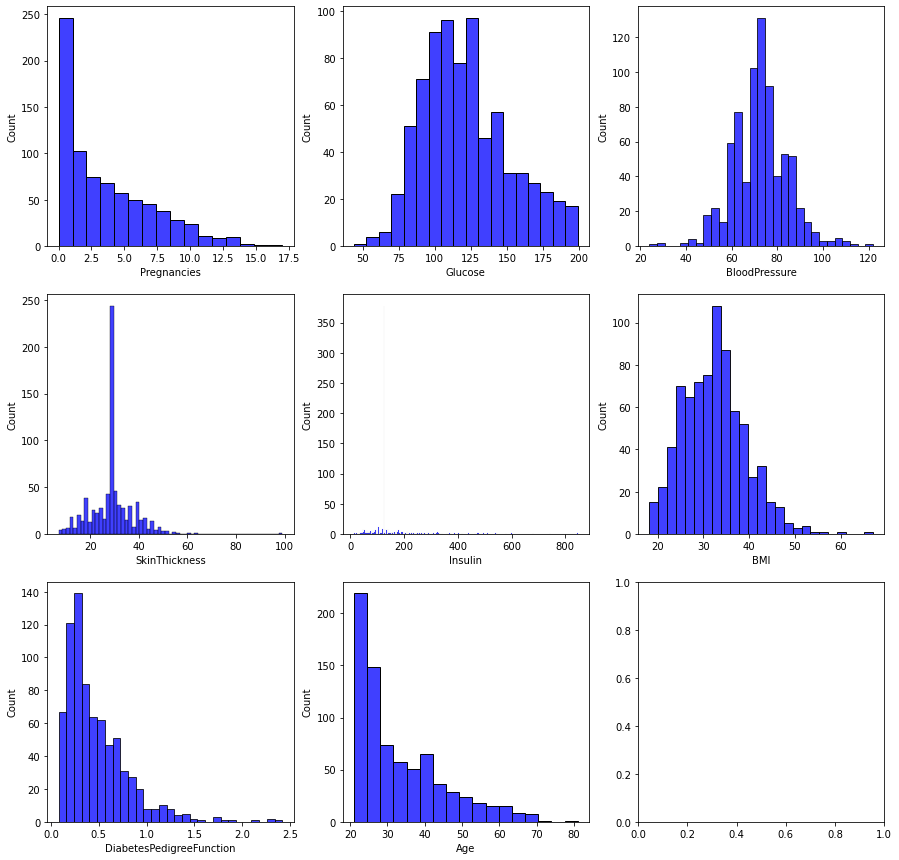

In [15]:
fig,axs = plt.subplots(nrows=3,ncols=3,figsize=(15,15))
sf_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
for i in range(0,len(sf_cols)):
    rows = i//3
    cols =i%3
    ax = axs[rows,cols]
    plot = sns.histplot (x=sf_cols[i],  data=Diabetes_Dataset,ax=ax,color="b")

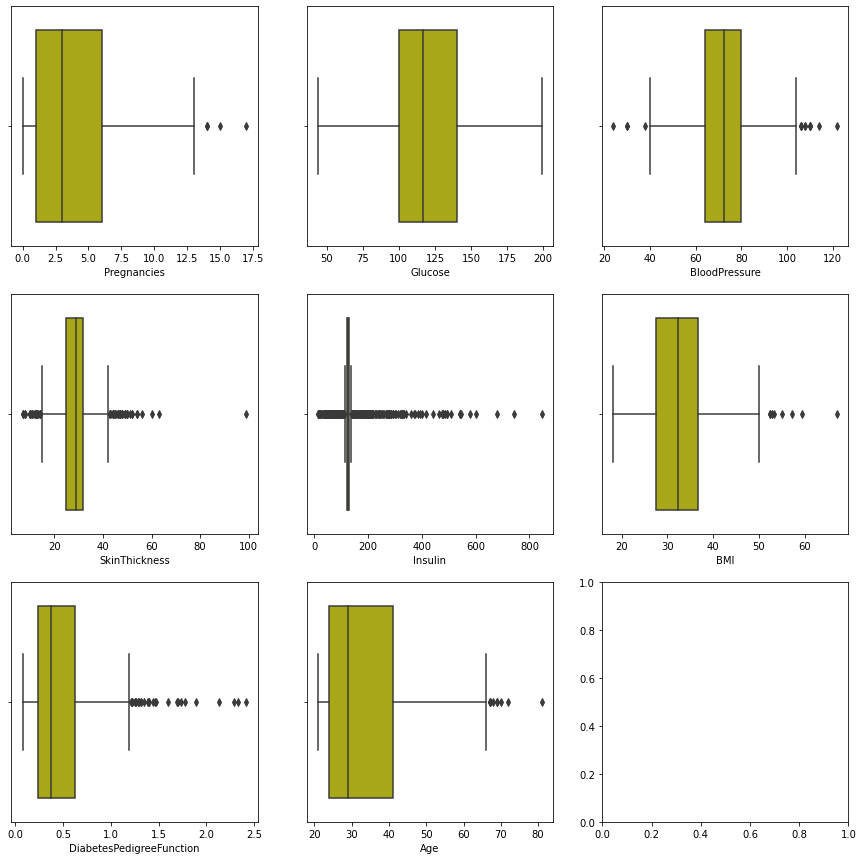

In [16]:
fig,axs = plt.subplots(nrows=3,ncols=3,figsize=(15,15))
sf_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
for i in range(0,len(sf_cols)):
    rows = i//3
    cols =i%3
    ax = axs[rows,cols]
    plot = sns.boxplot(x=sf_cols[i],  data=Diabetes_Dataset,ax=ax,color="y")

In [15]:
Diabetes_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [16]:
Diabetes_Dataset.dtypes.value_counts()

float64    6
int64      3
dtype: int64

#### Task2
Data Exploration:

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.
2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.
3. Perform correlation analysis. Visually explore it using a heat map.

<span style='color:Orange'> Step1: Analyze outcome (Label) with value count  </span>

In [17]:
Diabetes_Dataset["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<span style='color:Green'> Conclusion: Dataset is imbalance, it's recommended to use SMOTE or ADASYN, ADASYN is a generalized form of the SMOTE algorithm. </span>

<span style='color:Orange'> Step2: Analyze Features with Scatter Plots </span>

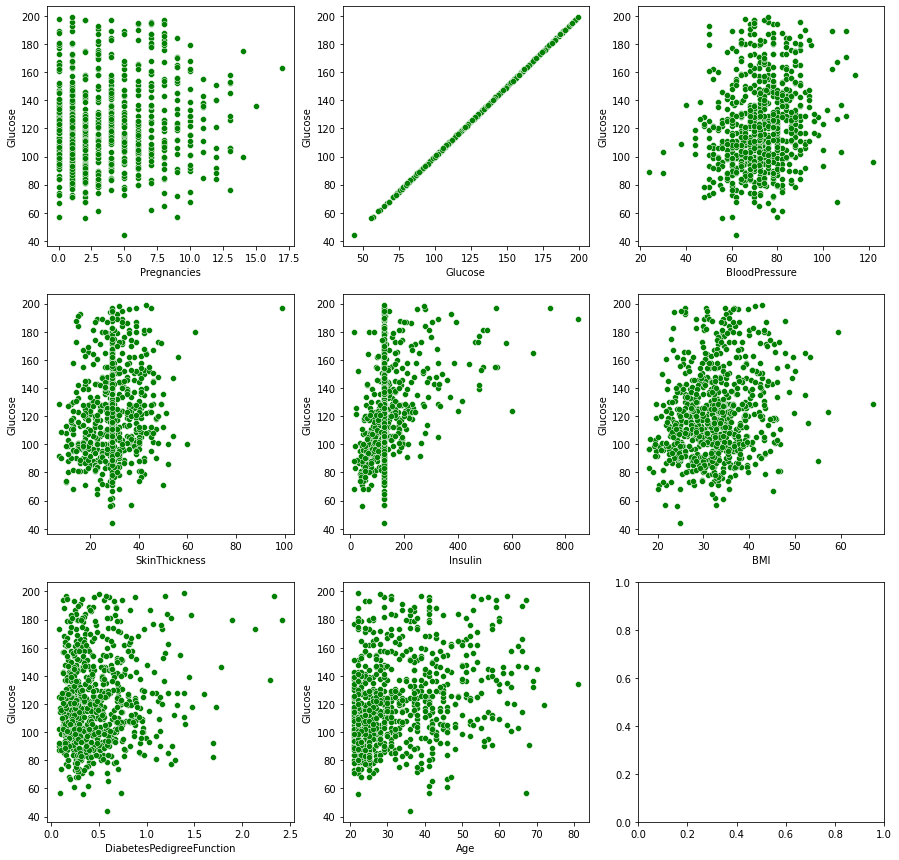

In [18]:
fig,axs = plt.subplots(nrows=3,ncols=3,figsize=(15,15))
sf_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
for i in range(0,len(sf_cols)):
    rows = i//3
    cols =i%3
    ax = axs[rows,cols]
    plot = sns.scatterplot (x=sf_cols[i], y=Diabetes_Dataset['Glucose'], data=Diabetes_Dataset,ax=ax,color="g")

<span style='color:Green'> Conclusion: Glucose positive relationship with majority features; strong positive with Insulin. </span>

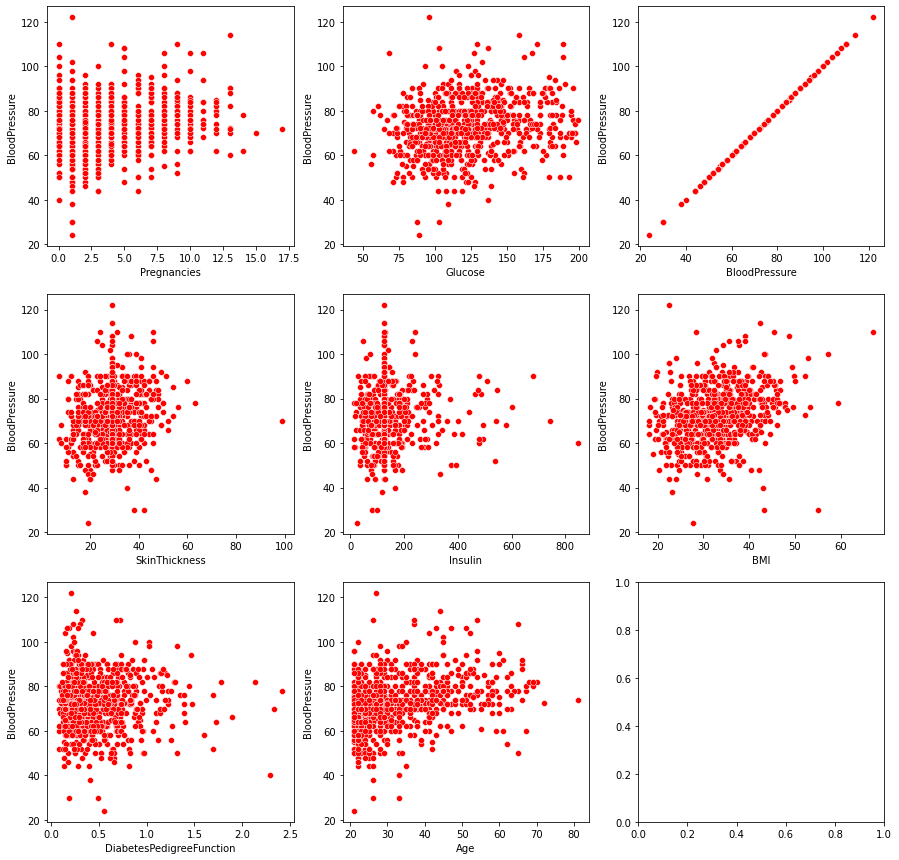

In [22]:
fig,axs = plt.subplots(nrows=3,ncols=3,figsize=(15,15))
sf_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
for i in range(0,len(sf_cols)):
    rows = i//3
    cols =i%3
    ax = axs[rows,cols]
    plot = sns.scatterplot (x=sf_cols[i], y=Diabetes_Dataset['BloodPressure'], data=Diabetes_Dataset,ax=ax,color="r")

<span style='color:Green'> Conclusion: BloodPressure positive relationship with majority features; but no strong positive relationship with any features. </span>

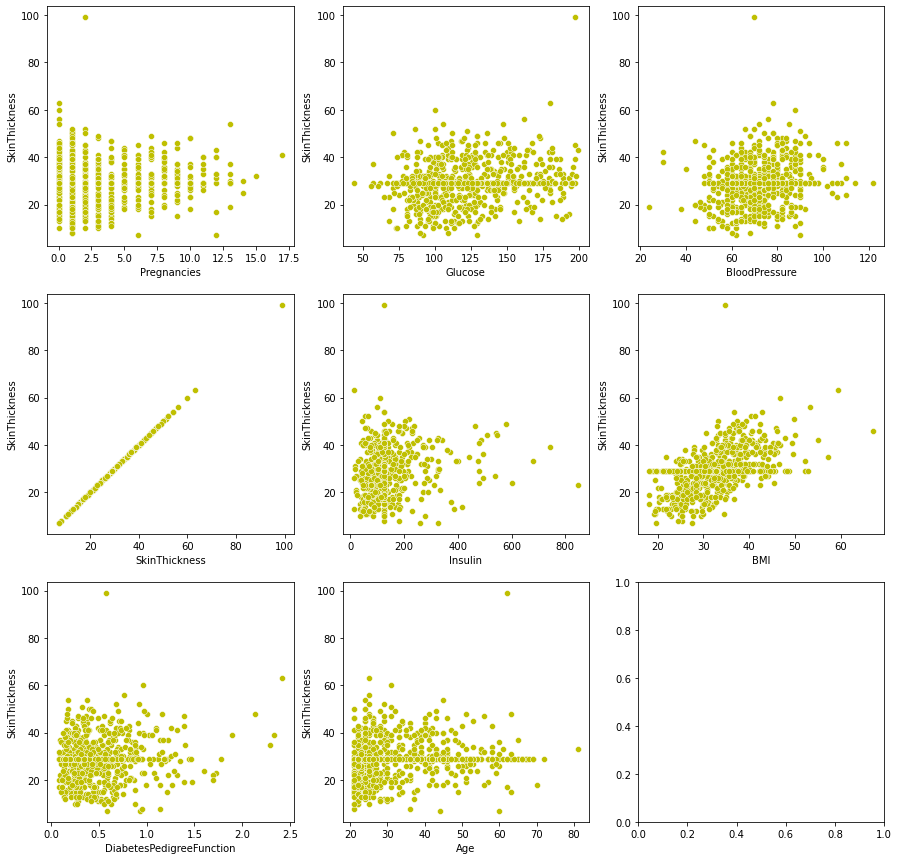

In [25]:
fig,axs = plt.subplots(nrows=3,ncols=3,figsize=(15,15))
sf_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
for i in range(0,len(sf_cols)):
    rows = i//3
    cols =i%3
    ax = axs[rows,cols]
    plot = sns.scatterplot (x=sf_cols[i], y=Diabetes_Dataset['SkinThickness'], data=Diabetes_Dataset,ax=ax,color="y")

<span style='color:Green'> Conclusion: SkinThickness positive relationship with majority features; strong positive with BMI. </span>

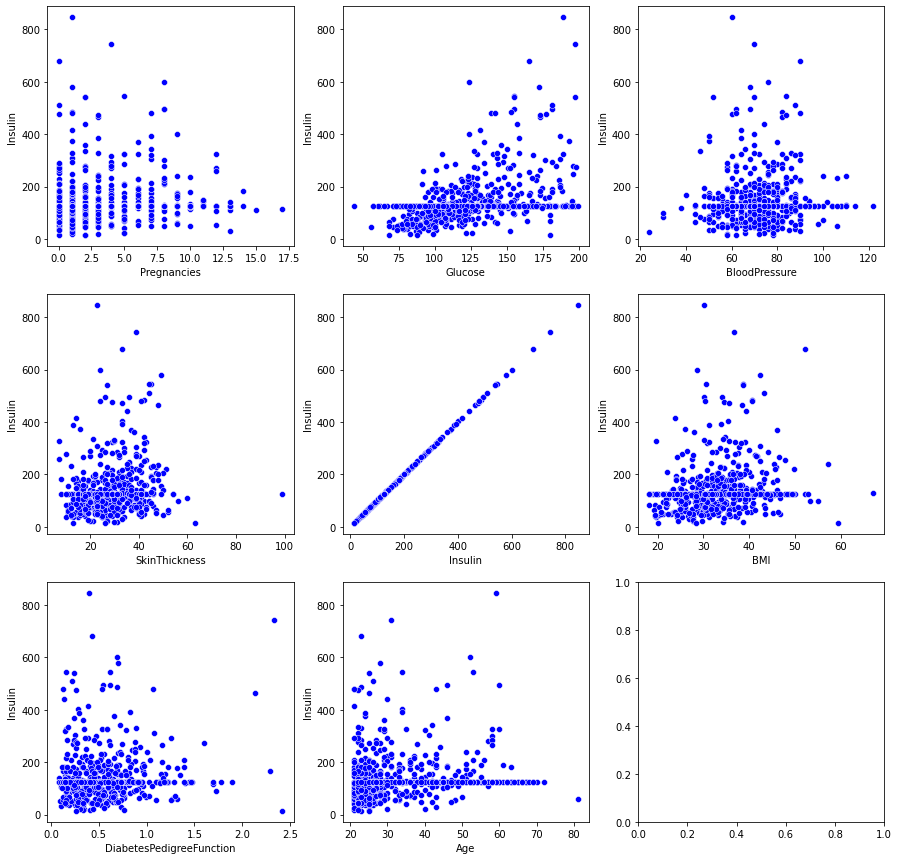

In [30]:
fig,axs = plt.subplots(nrows=3,ncols=3,figsize=(15,15))
sf_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
for i in range(0,len(sf_cols)):
    rows = i//3
    cols =i%3
    ax = axs[rows,cols]
    plot = sns.scatterplot (x=sf_cols[i], y=Diabetes_Dataset['Insulin'], data=Diabetes_Dataset,ax=ax,color="b")

<span style='color:Green'> Conclusion: SkinThickness positive relationship with majority features; but no strong positive relationship with any features. </span>

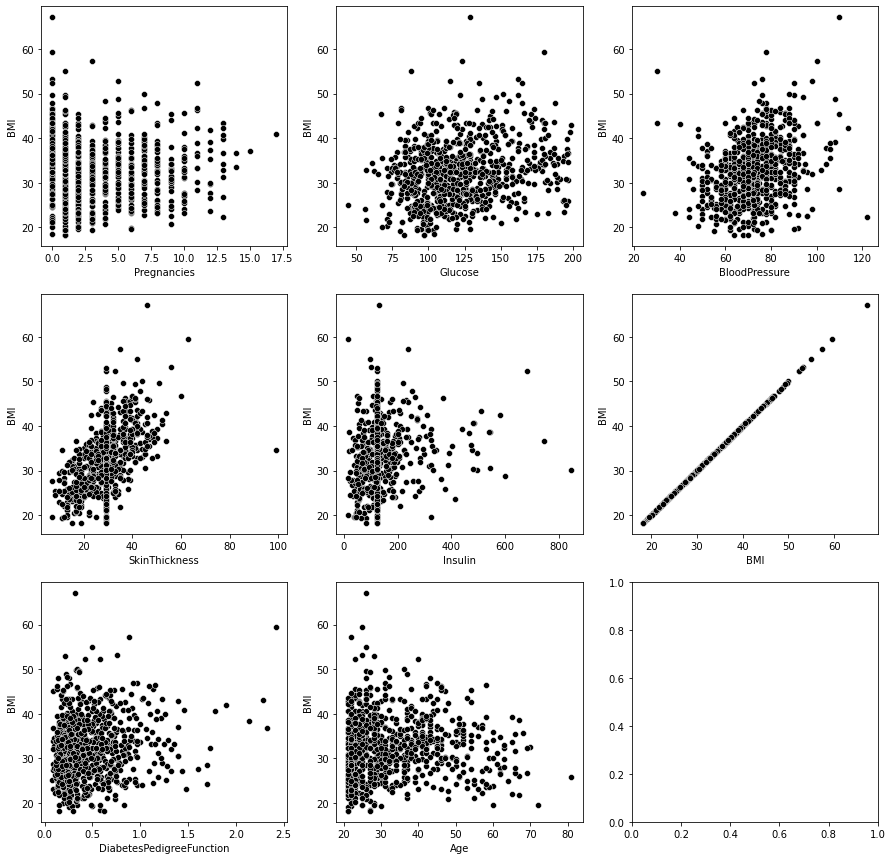

In [57]:
fig,axs = plt.subplots(nrows=3,ncols=3,figsize=(15,15))
sf_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
for i in range(0,len(sf_cols)):
    rows = i//3
    cols =i%3
    ax = axs[rows,cols]
    plot = sns.scatterplot (x=sf_cols[i], y=Diabetes_Dataset['BMI'], data=Diabetes_Dataset,ax=ax,color="k")

<span style='color:Green'> Conclusion: BMI positive relationship with majority features; strong positive with SkinThickness. </span>

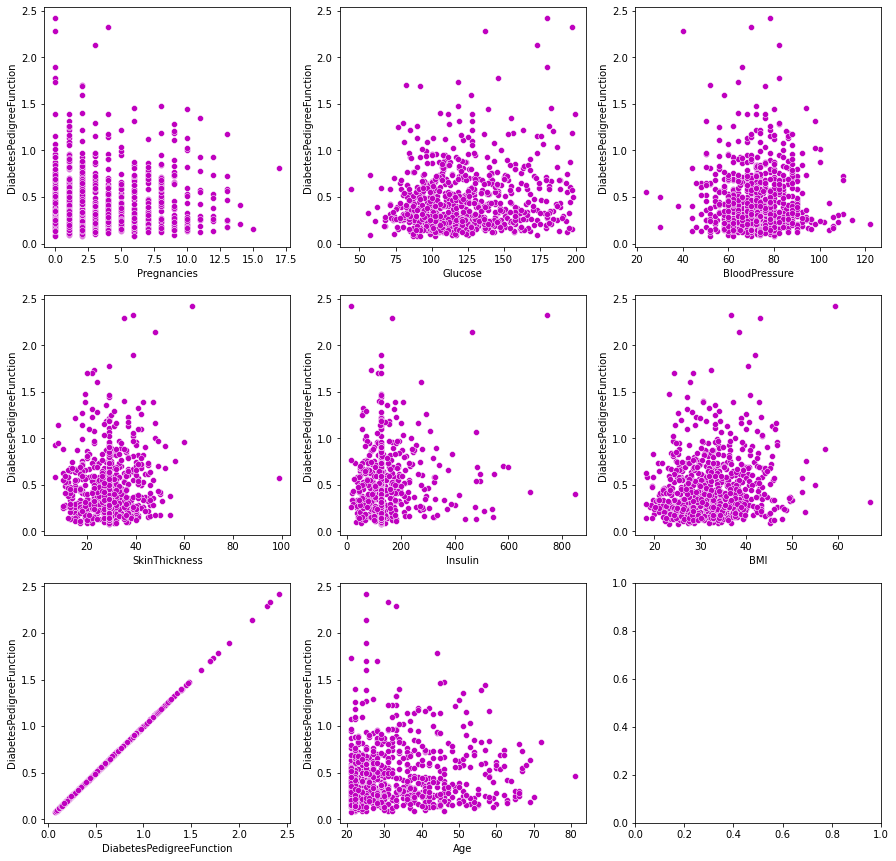

In [46]:
fig,axs = plt.subplots(nrows=3,ncols=3,figsize=(15,15))
sf_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
for i in range(0,len(sf_cols)):
    rows = i//3
    cols =i%3
    ax = axs[rows,cols]
    plot = sns.scatterplot (x=sf_cols[i], y=Diabetes_Dataset['DiabetesPedigreeFunction'], data=Diabetes_Dataset,ax=ax,color="m")

<span style='color:Green'> Conclusion: BMI positive relationship with majority features; but no strong positive relationship with any features. </span>

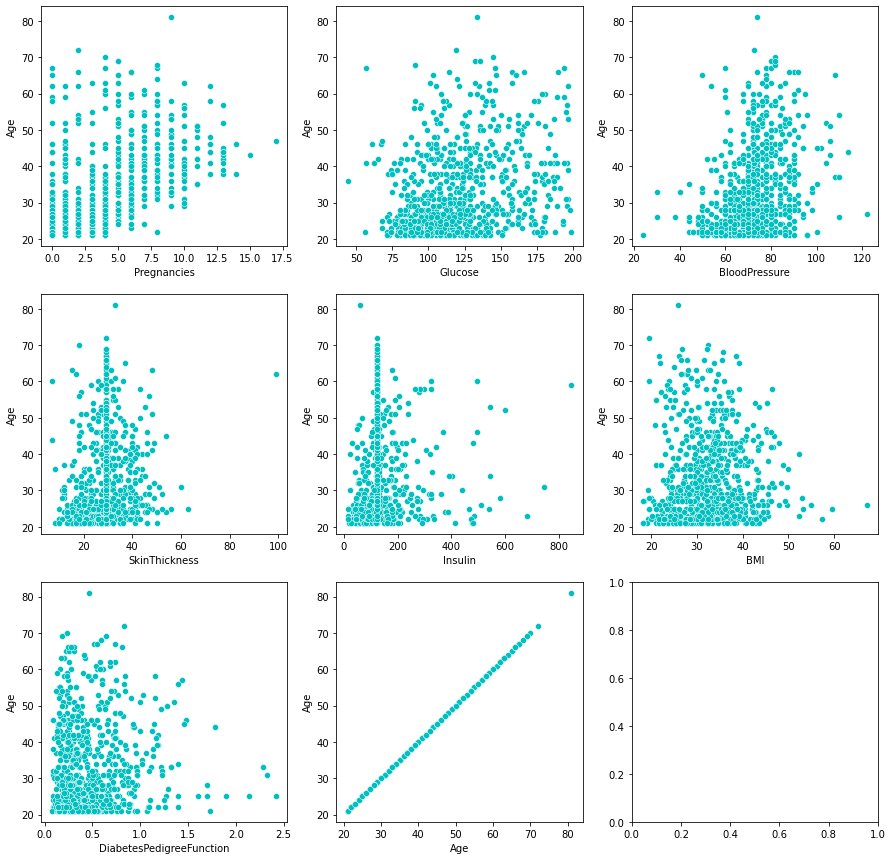

In [50]:
fig,axs = plt.subplots(nrows=3,ncols=3,figsize=(15,15))
sf_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
for i in range(0,len(sf_cols)):
    rows = i//3
    cols =i%3
    ax = axs[rows,cols]
    plot = sns.scatterplot (x=sf_cols[i], y=Diabetes_Dataset['Age'], data=Diabetes_Dataset,ax=ax,color="c")

<span style='color:Green'> Conclusion: Age positive relationship with majority features; strong positive with Pregnancies. </span>

<span style='color:Orange'> Step3: Analyze Features with HeatMap Plots </span>

In [47]:
Diabetes_Dataset[sf_cols].corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'Pregnancies'),
  Text(1.5, 0, 'Glucose'),
  Text(2.5, 0, 'BloodPressure'),
  Text(3.5, 0, 'SkinThickness'),
  Text(4.5, 0, 'Insulin'),
  Text(5.5, 0, 'BMI'),
  Text(6.5, 0, 'DiabetesPedigreeFunction'),
  Text(7.5, 0, 'Age')])

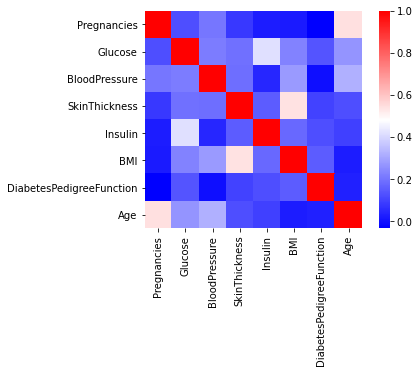

In [48]:
sns.heatmap(data=Diabetes_Dataset[sf_cols].corr(),square=True,cmap="bwr")
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)

<span style='color:Green'> Conclusion: Few strong positive relationship observed, but there are not significant to drop specific features. </span>

#### Task3
Data Modeling - par1:

1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.
2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

Data Modeling - part2:

1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

<span style='color:Orange'> Step1: As outcome in not balanced, One approach to addressing imbalanced datasets is to oversample the minority class, in this case Diabetes Dataset. This type of data augmentation for the minority class is referred to as the Synthetic Minority Oversampling Technique. We will use ADASYN, ADASYN is a generalized form of the SMOTE algorithm. it considers the density distribution, which decides the no. of synthetic instances generated for samples.   </span>

In [26]:
import imblearn

In [27]:
from imblearn.over_sampling import ADASYN

In [28]:
ADA = ADASYN()

In [29]:
Features = Diabetes_Dataset.drop("Outcome",axis=1)
Label = Diabetes_Dataset["Outcome"]

In [30]:
print(Features.shape, Label.shape)

(768, 8) (768,)


In [31]:
Features_ADA,Label_ADA = ADA.fit_resample(Features,Label)

In [32]:
print(Features_ADA.shape, Label_ADA.shape)

(1002, 8) (1002,)


In [33]:
Label_ADA.value_counts()

1    502
0    500
Name: Outcome, dtype: int64

<span style='color:Green'> Conclusion: Using ADASYN data become more balanced, we will use 1st Model: LogisticRegression, 2nd Model: DecisionTreeClassifier, 3rd Model: KNeighborsClassifier and 4th Model: RandomForestClassifier for analysis. Statistics precision; recall; f1-score will be used for assessment. </span>

<span style='color:Orange'> Step2:a Import required libraries (LogisticRegression) with classification_report and train-test split. Create 1st Model </span>

In [113]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report,auc,roc_curve,roc_auc_score,confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [114]:
X_train, X_test, Y_train, Y_test = train_test_split(Features_ADA, Label_ADA, test_size = 0.25 , random_state = 20)

In [115]:
LogR = LogisticRegression()

In [116]:
LogR.fit(X_train,Y_train)

LogisticRegression()

In [117]:
pred = LogR.predict(X_test)

In [118]:
print("Training score is ",LogR.score(X_train,Y_train))
print("Testing score is ",LogR.score(X_test,Y_test))
fpr_LogR,tpr_LogR,thresholds_LogR = roc_curve(Y_test,pred, pos_label=1)
print("AUC Score with LogisticRegression ",roc_auc_score(Y_test,pred))

Training score is  0.6910785619174434
Testing score is  0.6653386454183267
AUC Score with LogisticRegression  0.6657566803699897


In [144]:
print("Classification report for LogisticRegression")
print("============================================")
print(classification_report(Label_ADA,LogR.predict(Features_ADA)))

Classification report for LogisticRegression
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       500
           1       0.67      0.72      0.69       502

    accuracy                           0.68      1002
   macro avg       0.69      0.68      0.68      1002
weighted avg       0.69      0.68      0.68      1002



<span style='color:Orange'> Step2:b Import required libraries (DecisionTreeClassifier). Create 2nd Model </span>

In [120]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dtree = DecisionTreeClassifier()

In [121]:
dtree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [122]:
pred = dtree.predict(X_test)

In [123]:
print("Training score is ",dtree.score(X_train,Y_train))
print("Testing score is ",dtree.score(X_test,Y_test))
fpr_dtree,tpr_dtree,thresholds_dtree = roc_curve(Y_test,pred, pos_label=1)
print("AUC Score with DecisionTreeClassifier ",roc_auc_score(Y_test,pred))

Training score is  1.0
Testing score is  0.7171314741035857
AUC Score with DecisionTreeClassifier  0.7237923946557039


In [145]:
print("Classification report for DecisionTreeClassifier")
print("================================================")
print(classification_report(Label_ADA,dtree.predict(Features_ADA)))

Classification report for DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       500
           1       0.91      0.95      0.93       502

    accuracy                           0.93      1002
   macro avg       0.93      0.93      0.93      1002
weighted avg       0.93      0.93      0.93      1002



<span style='color:Orange'> Step2:c Import required libraries (RandomForestClassifier). Create 3rd Model </span>

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
RFC = RandomForestClassifier()

In [127]:
RFC.fit(X_train,Y_train)

RandomForestClassifier()

In [128]:
pred = RFC.predict(X_test)

In [129]:
print("Training score is ",RFC.score(X_train,Y_train))
print("Testing score is ",RFC.score(X_test,Y_test))
fpr_RFC,tpr_RFC,thresholds_RFC = roc_curve(Y_test,pred, pos_label=1)
print("AUC Score with RandomForestClassifier ",roc_auc_score(Y_test,pred))

Training score is  1.0
Testing score is  0.7888446215139442
AUC Score with RandomForestClassifier  0.7963450668036999


In [146]:
print("Classification report for RandomForestClassifier")
print("================================================")
print(classification_report(Label_ADA,RFC.predict(Features_ADA)))

Classification report for RandomForestClassifier
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       500
           1       0.93      0.97      0.95       502

    accuracy                           0.95      1002
   macro avg       0.95      0.95      0.95      1002
weighted avg       0.95      0.95      0.95      1002



<span style='color:Orange'> Step2:c Import required libraries (KNeighborsClassifier). Create 4th Model </span>

In [131]:
from sklearn.neighbors import KNeighborsClassifier

In [132]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [133]:
neigh.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [134]:
pred = neigh.predict(X_test)

In [135]:
print("Training score is ",neigh.score(X_train,Y_train))
print("Testing score is ",neigh.score(X_test,Y_test))
fpr_neigh,tpr_neigh,thresholds_neigh = roc_curve(Y_test,pred, pos_label=1)
print("AUC Score with KNeighborsClassifier ",roc_auc_score(Y_test,pred))

Training score is  0.8668442077230359
Testing score is  0.7729083665338645
AUC Score with KNeighborsClassifier  0.7880267214799589


In [147]:
print("Classification report for KNeighborsClassifier")
print("==============================================")
print(classification_report(Label_ADA,neigh.predict(Features_ADA)))

Classification report for KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.94      0.73      0.82       500
           1       0.78      0.95      0.86       502

    accuracy                           0.84      1002
   macro avg       0.86      0.84      0.84      1002
weighted avg       0.86      0.84      0.84      1002



<span style='color:Green'> Conclusion: Sensitivity / True Positive Rate / Recall - Sensitivity tells us what proportion of the positive class got correctly classified. A simple term what proportion of the actual Diabetes (Outcome = 1) people were correctly detected by the model.</span>

<span style='color:Green'> When we study recall metrics for outcome = 1, for above models. and we shortlist KNeighborsClassifier and RandomForestClassifier </span>
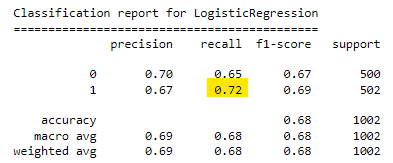
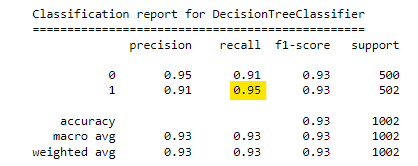
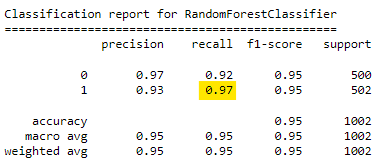
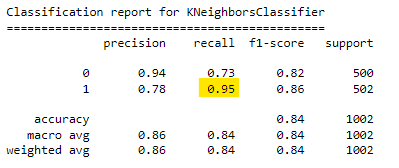

Additionally, when we analyze the AUC score KNeighborsClassifier and RandomForestClassifier doing better.

</span>

<span style='color:Orange'> Step3 We will analyze two  models RandomForestClassifier and KNeighborsClassifier using AUC-ROC Curve; Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.  </span>

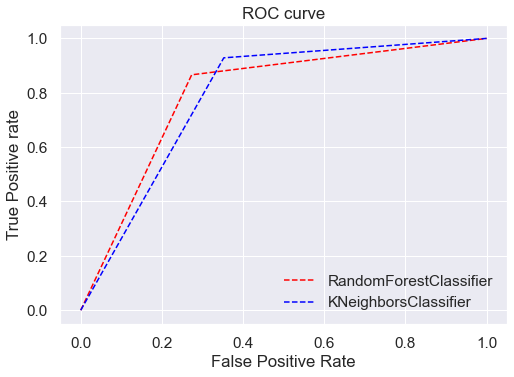

In [149]:
# plot roc curves
# plt.plot(fpr_LogR, tpr_LogR, linestyle='--',color='orange', label='Logistic Regression')
# plt.plot(fpr_dtree, tpr_dtree, linestyle='--',color='green', label='DecisionTreeClassifier')
plt.plot(fpr_RFC, tpr_RFC, linestyle='--',color='red', label='RandomForestClassifier')
plt.plot(fpr_neigh, tpr_neigh, linestyle='--',color='blue', label='KNeighborsClassifier')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=400)
plt.show();

Classification report for KNeighborsClassifier


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

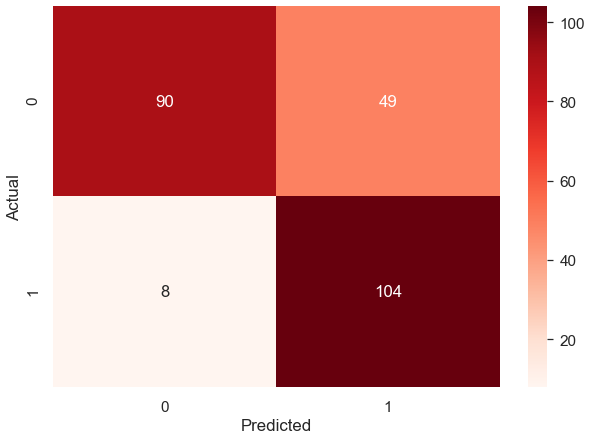

In [151]:
print("Classification report for KNeighborsClassifier")
print("==============================================")
data = confusion_matrix(Y_test,neigh.predict(X_test))
df_cm = pd.DataFrame(data, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Reds", annot=True, fmt='d')

Classification report for RandomForestClassifier


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

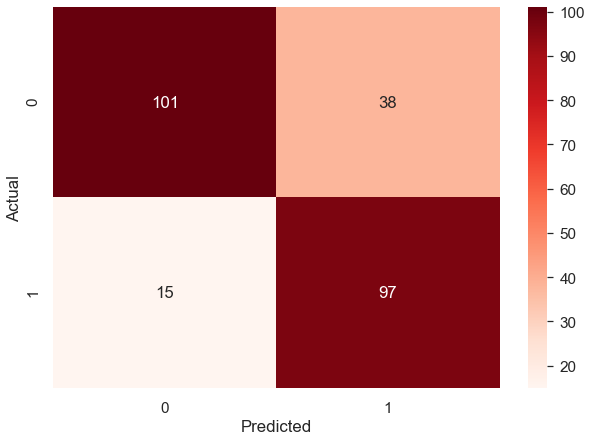

In [150]:
print("Classification report for RandomForestClassifier")
print("================================================")
data = confusion_matrix(Y_test,RFC.predict(X_test))
df_cm = pd.DataFrame(data, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Reds", annot=True, fmt='d')

<span style='color:Green'> Conclusion: We will shortlist KNeighborsClassifier model. </span>

#### Task4

Data Reporting:

2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a. Pie chart to describe the diabetic or non-diabetic population <br>
b. Scatter charts between relevant variables to analyze the relationships <br>
c. Histogram or frequency charts to analyze the distribution of the data <br>
d. Heatmap of correlation analysis among the relevant variables <br>
e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

<span style='color:Green'> Kindly refer the solution at: </span>
https://public.tableau.com/app/profile/mayank6386/viz/AssignmentExcel/Healthcare?publish=yes